In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
!pip install mne
!pip install wfdb pyEDFlib PyWavelets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 4.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 5.0 MB/s 
     |████████████████████████████████| 2.4 MB 49.4 MB/s 


# Exploring the Epileptologie Database

The dataset contains 5 data directories: 


1.   Set A - Surface EEG taken from 5 volunteers in a relaxed state with eyes open
2.   Set B - Surface EEG taken from 5 volunteers in a relaxed state with eyes closed
3.   Set C - Intracranial EEG taken from 5 patients from the hippocampal formation of the opposite hemisphere of the brain  (Seizure Free Interval).
4.   Set D - Intracranial EEG taken from 5 patients from from within the epileptogenic zone (Seizure Free Interval).
5.   Set E - Intracranial EEG taken from 5 patients from from within the epileptogenic zone (Seizing Interval).

For this project, I will be chosing Set D (Set F) and Set E (Set S) to obtain the final objective of detecting seizure or not.

Each data directory has 100 single-channel segments (~23.6s long) that were selected and cut from a continuous multi-channel EEG signal taken from five volunteers. 



In [ ]:
%cd ./drive/MyDrive/BME1473_Project

import os
import re
import glob            # for file locations
import pprint          # for pretty printing
import zipfile

pp = pprint.PrettyPrinter()

DATA_DIR = 'Dataset'
SEIZURE_SET = 'S'
NONSEIZURE_SET = 'F'

# Exploring single segments from seizure and non-seizure datasets
epil_baseline_file = os.path.join(DATA_DIR, NONSEIZURE_SET, 'F060.txt')
epil_seizure_file = os.path.join(DATA_DIR, SEIZURE_SET, 'S033.txt')

/content/drive/MyDrive/BME1473_Project


In [ ]:
import pandas as pd     # dataframes

# Read data as a Pandas DataFrame
# The dataframes hold 2-dimensional labeled data structure with columns of potentially different types.

def data_load(file_path, output=False):
    # read in the datafile
    data = pd.read_csv(file_path,                 # file in
                       header=None,               # no column names at top of file
                       dtype=float)               # read data as 'floating points' (e.g. 1.0)

    if output:
        print(color.BOLD+color.UNDERLINE+'\n'+re.findall('\w\d+',file_path)[0]+color.END)
        # Output detailed information on the data
        print(color.BOLD+'\nData Information'+color.END)
        data.info()

        # Output first 5 rows and columns
        print(color.BOLD+'\nDataframe Head'+color.END)
        display(data.head())
        
    return data
        
epil_baseline_df = data_load(epil_baseline_file, output=True)
epil_seizure_df = data_load(epil_seizure_file, output=True)


F060

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4097 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB

Dataframe Head


,0
0,162.0
1,164.0
2,164.0
3,154.0
4,139.0



S033

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4097 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB

Dataframe Head


,0
0,216.0
1,182.0
2,146.0
3,128.0
4,116.0


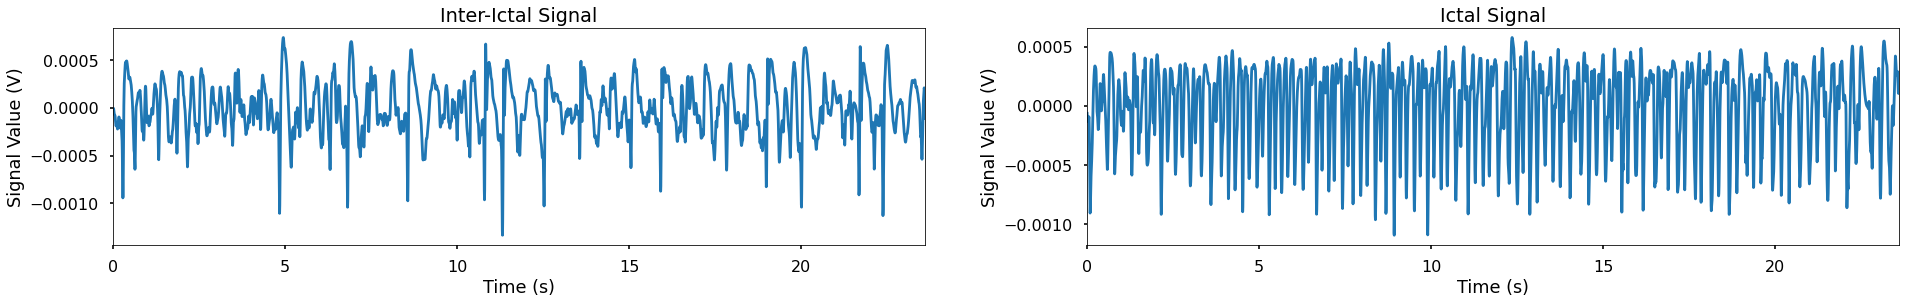

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

sample_rate = 173.61        # Sampling Frequency (Hz)

# Converting signals from uV to V
epil_baseline_v = epil_baseline_df.apply(lambda x: x * 1e-6)
epil_seizure_v = epil_seizure_df.apply(lambda x: x * 1e-6)

# filter the data (primary analysis required)
b, a = signal.butter(4, [1 / (sample_rate / 2), 30 / (sample_rate / 2)], 'bandpass', analog = False)

epil_baseline_filt = signal.filtfilt(b, a, epil_baseline_v.T).T;
epil_seizure_filt = signal.filtfilt(b, a, epil_seizure_v.T).T;

# Plotting the data

t_vect = np.arange(0, len(epil_baseline_filt)) / sample_rate

plt.figure(figsize = (32, 4))
plt.subplot(121)
plt.plot(t_vect, epil_baseline_filt)
plt.xlim(min(t_vect), max(t_vect))
plt.title('Inter-Ictal Signal'); plt.xlabel('Time (s)')
plt.ylabel('Signal Value (V)')

plt.subplot(122)
plt.plot(t_vect, epil_seizure_filt)
plt.xlim(min(t_vect), max(t_vect))
plt.title('Ictal Signal'); plt.xlabel('Time (s)')
plt.ylabel('Signal Value (V)')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


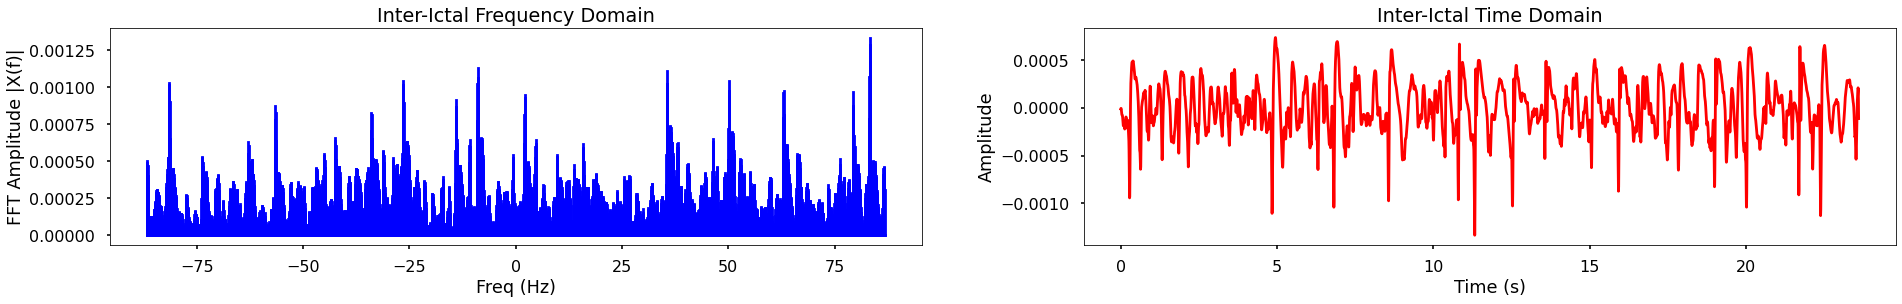

In [ ]:
from numpy.fft import fft, ifft

epil_baseline_FFT = fft(epil_baseline_filt)
N = len(epil_baseline_filt)
f_vect = np.fft.fftfreq(N) * sample_rate

plt.figure(figsize = (32, 4))
plt.subplot(121)
plt.stem(f_vect, np.abs(epil_baseline_FFT), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(f)|')
plt.title('Inter-Ictal Frequency Domain')

plt.subplot(122)
plt.plot(t_vect, ifft(epil_baseline_FFT), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Inter-Ictal Time Domain')
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


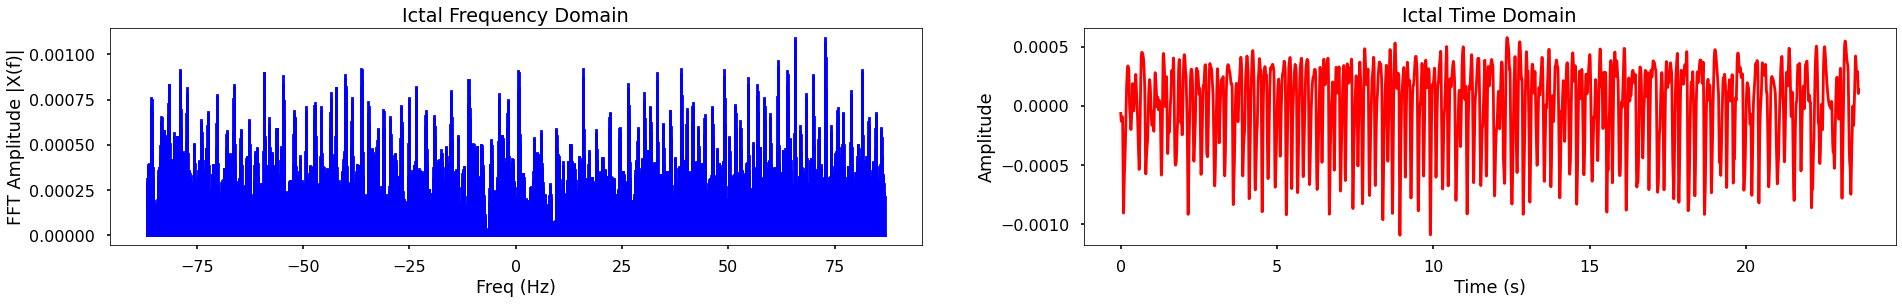

In [ ]:
epil_seizure_FFT = fft(epil_seizure_filt)

plt.figure(figsize = (32, 4))
plt.subplot(121)
plt.stem(f_vect, np.abs(epil_seizure_FFT), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(f)|')
plt.title('Ictal Frequency Domain')

plt.subplot(122)
plt.plot(t_vect, ifft(epil_seizure_FFT), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Ictal Time Domain')

plt.show()

Each dataframe has one column which corresponds to the signal sample values. We have 4097 samples which is equal to a total time segment of ~23.6s at a sampling frequency of 173.61 Hz. 

Lets now randomly sample 9 files from each folder and plot them to get an idea of how they look.

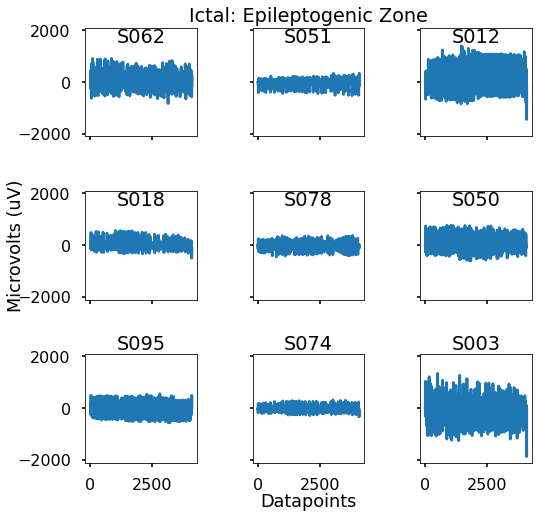

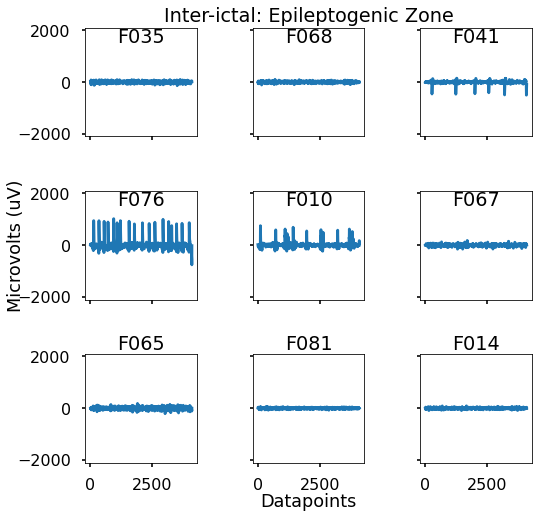

In [ ]:
import random

for directory in [SEIZURE_SET, NONSEIZURE_SET]:
  sig_files = glob.glob(os.path.join(DATA_DIR, directory, '*.txt'))

  # randomly select 9 files from the list
  sampled_files = random.sample(sig_files, 9)

  fig, axs = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (8, 8))
  x=0; y=0

  for file in sampled_files:

      # read in the datafile
      data = pd.read_csv(file,                # file in
                          header = None,      # no column names at top of file
                          dtype = float)      # read data as 'floating points' (e.g. 1.0)

      # filter the data
      b, a = signal.butter(4, [1 / (sample_rate / 2), 30 / (sample_rate / 2)], 'bandpass', analog=False)
      filt_data = signal.filtfilt(b, a, data.T).T
      
      axs[x, y].plot(filt_data)
      axs[x, y].set_title(re.findall('\w\d+', file)[0], pad =-15)
      # plot all of them on the same scale
      axs[x, y].set_ylim([-2100, 2100])

      x += 1

      if x == 3:
          y += 1
          x = 0


  # add a big axes, hide frame
  fig.add_subplot(111, frameon = False)
  # hide tick and tick label of the big axes
  plt.tick_params(labelcolor = 'none', top=False, bottom=False, left=False, right=False)
  plt.grid(False)
  plt.xlabel("Datapoints", labelpad = 0.5)
  plt.ylabel("Microvolts (uV)", labelpad = 20)
  plt.subplots_adjust(wspace = 0.5, hspace = 0.5)    

  if directory == 'F':
      plt.title('Inter-ictal: Epileptogenic Zone')

  elif directory == 'S':
      plt.title('Ictal: Epileptogenic Zone')
  
  plt.show()